### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

2022-05-21 17:26:17.449397: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df[application_df.columns].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
values_count = application_df['APPLICATION_TYPE'].value_counts()
values_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

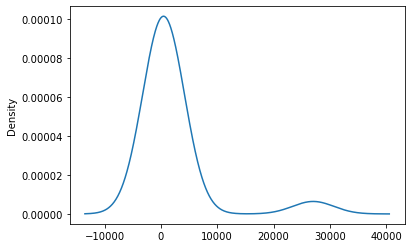

In [5]:
# Visualize the value counts of APPLICATION_TYPE
values_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(values_count[values_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
clasification_count = application_df['CLASSIFICATION'].value_counts()
clasification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

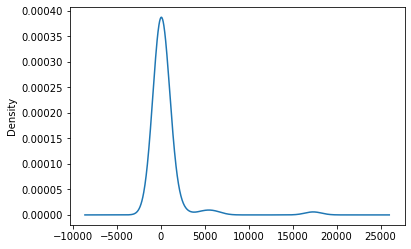

In [8]:
# Visualize the value counts of CLASSIFICATION
clasification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(clasification_count[clasification_count < 1250].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
application_df[application_df.columns].nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [11]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Generate our categorical variable lists
application_cat = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION","INCOME_AMT", "SPECIAL_CONSIDERATIONS"]

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True)
merged_df = merged_df.drop(application_cat,1)
merged_df.head()

/home/adrian/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/home/adrian/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

2022-05-21 17:26:46.679436: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-21 17:26:47.639305: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-21 17:26:48.257292: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-21 17:26:48.257417: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adrian-GE70-2PE): /proc/driver/nvidia/version does not exist
2022-05-21 17:26:48.260294: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fl

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/AlphabetSoupCharity.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

2022-05-21 17:26:49.504719: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-21 17:26:49.592726: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2394425000 Hz


Epoch 1/100
  1/804 [..............................] - ETA: 24:32 - loss: 207.6497 - accuracy: 0.5312
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
  6/804 [..............................] - ETA: 9s - loss: 349.0377 - accuracy: 0.5144   
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
 26/804 [..............................] - ETA: 3s - loss: 1312.9051 - accuracy: 0.5061
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 9153.9084 - accuracy: 0.5062
Epoch

406/804 [==============>...............] - ETA: 1s - loss: 50969.7408 - accuracy: 0.4949
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 51484.3073 - accuracy: 0.4946
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 51776.9245 - accuracy: 0.4944
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 52058.7811 - accuracy: 0.4942
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: savi

804/804 [==============================] - 5s 4ms/step - loss: 64624.8171 - accuracy: 0.4965
Epoch 2/100
  1/804 [..............................] - ETA: 3s - loss: 13.3707 - accuracy: 0.3125
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 12/804 [..............................] - ETA: 3s - loss: 629.7057 - accuracy: 0.4635
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 28/804 [>.............................] - ETA: 2s - loss: 1324.1199 - accuracy: 0.4779
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 1397.6651 - accura


Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
384/804 [=============>................] - ETA: 1s - loss: 47817.9279 - accuracy: 0.5023
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
397/804 [=============>................] - ETA: 1s - loss: 49181.9394 - accuracy: 0.5028
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 50123.6081 - accuracy: 0.5031
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 51365.0832 - accuracy: 0.5035
Epoch 00002: savi


Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 56642.0991 - accuracy: 0.5046
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 56516.3498 - accuracy: 0.5046
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
787/804 [============================>.] - ETA: 0s - loss: 56377.0155 - accuracy: 0.5046
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
804/804 [===========================

344/804 [===========>..................] - ETA: 2s - loss: 27792.8140 - accuracy: 0.5298
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
358/804 [============>.................] - ETA: 2s - loss: 29412.8529 - accuracy: 0.5297
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
373/804 [============>.................] - ETA: 1s - loss: 30909.3351 - accuracy: 0.5295
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
388/804 [=============>................] - ETA: 1s - loss: 32191.0550 - accuracy: 0.5293
Epoch 00003: savi

703/804 [=========================>....] - ETA: 0s - loss: 41150.1714 - accuracy: 0.5243
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 41352.7607 - accuracy: 0.5241
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 41540.5690 - accuracy: 0.5239
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 41726.4050 - accuracy: 0.5237
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 41918.8147 - accuracy: 0.5235

254/804 [========>.....................] - ETA: 3s - loss: 2352.3741 - accuracy: 0.5170
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 2419.1414 - accuracy: 0.5167
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 2466.3731 - accuracy: 0.5164
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 2494.0995 - accuracy: 0.5162
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving m


Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 6585.6932 - accuracy: 0.5092
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 6861.9369 - accuracy: 0.5090
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 7128.7928 - accuracy: 0.5089
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 7515.1274 - accuracy: 0.5088
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving m

205/804 [======>.......................] - ETA: 2s - loss: 12446.9440 - accuracy: 0.4955
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 12102.3553 - accuracy: 0.4952
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 11780.1136 - accuracy: 0.4950
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 11364.2709 - accuracy: 0.4946
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
250/804 [========>

610/804 [=====================>........] - ETA: 0s - loss: 7641.1998 - accuracy: 0.5000
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 7591.8633 - accuracy: 0.5001
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 7543.0747 - accuracy: 0.5002
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 7498.3504 - accuracy: 0.5002
Epoch 00005: saving m

188/804 [======>.......................] - ETA: 2s - loss: 3304.3535 - accuracy: 0.5375
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 3453.5450 - accuracy: 0.5373
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 3999.6504 - accuracy: 0.5371
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 4945.9115 - accuracy: 0.5369
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
231/804 [=======>.....

571/804 [====================>.........] - ETA: 1s - loss: 13395.0623 - accuracy: 0.5275
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 13467.6118 - accuracy: 0.5272
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 13537.5009 - accuracy: 0.5269
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 13604.4168 - accuracy: 0.5267
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 13668.2100 - accuracy: 0.5264

132/804 [===>..........................] - ETA: 3s - loss: 52294.6805 - accuracy: 0.4879
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 50458.9649 - accuracy: 0.4870
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 48739.1092 - accuracy: 0.4861
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 47433.8713 - accuracy: 0.4852
Epoch 00007: savi


Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 50166.7623 - accuracy: 0.4890
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 49937.3290 - accuracy: 0.4893
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 49724.7434 - accuracy: 0.4896
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
587/804 [====================>......

113/804 [===>..........................] - ETA: 3s - loss: 4355.7490 - accuracy: 0.5330
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 4512.3739 - accuracy: 0.5330
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 4579.1853 - accuracy: 0.5329
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 4651.6844 - accuracy: 0.5329
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving m

523/804 [==================>...........] - ETA: 1s - loss: 5260.4697 - accuracy: 0.5156
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 5328.1276 - accuracy: 0.5153
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 5375.5746 - accuracy: 0.5151
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 5422.0188 - accuracy: 0.5149
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
568/804 [=============

104/804 [==>...........................] - ETA: 3s - loss: 33475.0450 - accuracy: 0.5008
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 32899.5522 - accuracy: 0.5023
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 32072.0087 - accuracy: 0.5039
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 31013.6549 - accuracy: 0.5049
Epoch 00009: savi

489/804 [=================>............] - ETA: 1s - loss: 18767.6537 - accuracy: 0.5153
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
508/804 [=================>............] - ETA: 1s - loss: 18849.9779 - accuracy: 0.5155
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 18888.8774 - accuracy: 0.5156
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 18902.3281 - accuracy: 0.5157
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: savi


Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
 70/804 [=>............................] - ETA: 2s - loss: 9510.4267 - accuracy: 0.4850
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 10091.9703 - accuracy: 0.4851
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 10285.6953 - accuracy: 0.4853
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 10346.1662 - accuracy: 0.4855
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: savin


Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 9630.0970 - accuracy: 0.4980
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 9563.7271 - accuracy: 0.4981
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
465/804 [================>.............] - ETA: 1s - loss: 9455.6617 - accuracy: 0.4984
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
472/804 [================>.............] - ETA: 1s - loss: 9405.7309 - accuracy: 0.4985
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
481/804 [=============

  1/804 [..............................] - ETA: 1s - loss: 6.9627 - accuracy: 0.7188
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 11/804 [..............................] - ETA: 4s - loss: 55.8798 - accuracy: 0.6046
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 24/804 [..............................] - ETA: 3s - loss: 159.7309 - accuracy: 0.5708
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 244.0005 - accuracy: 0.5536
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 46/804 [>...................


Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
396/804 [=============>................] - ETA: 1s - loss: 2410.5718 - accuracy: 0.5080
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 2397.5709 - accuracy: 0.5079
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 2391.1293 - accuracy: 0.5078
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
436/804 [===============>..............

785/804 [============================>.] - ETA: 0s - loss: 2512.6537 - accuracy: 0.5048
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 2502.6566 - accuracy: 0.5048
Epoch 12/100
  1/804 [..............................] - ETA: 0s - loss: 1.0467 - accuracy: 0.5000
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
 20/804 [..............................] - ETA: 2s - loss: 23.5224 - accuracy: 0.5684
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00

409/804 [==============>...............] - ETA: 1s - loss: 265.3509 - accuracy: 0.5245
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 267.7252 - accuracy: 0.5241
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 270.3611 - accuracy: 0.5237
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 273.5513 - accuracy: 0.5231
Epoch 00012: saving model

 23/804 [..............................] - ETA: 4s - loss: 1345.2242 - accuracy: 0.4986
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 1506.1280 - accuracy: 0.5005
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 1762.4628 - accuracy: 0.5040
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 73/804 [=>............................


Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 1643.9022 - accuracy: 0.5212
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
466/804 [================>.............] - ETA: 1s - loss: 1712.3437 - accuracy: 0.5211
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
483/804 [=================>............] - ETA: 1s - loss: 1773.4934 - accuracy: 0.5210
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoin


Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.7059 - accuracy: 0.5462
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.7080 - accuracy: 0.5424
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.7096 - accuracy: 0.5394
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/Alphab

480/804 [================>.............] - ETA: 1s - loss: 0.7131 - accuracy: 0.5282
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.7130 - accuracy: 0.5283
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.7129 - accuracy: 0.5283
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.7128 - accuracy: 0.5284
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to chec

 93/804 [==>...........................] - ETA: 2s - loss: 0.6995 - accuracy: 0.5275
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.6991 - accuracy: 0.5283
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.6987 - accuracy: 0.5292
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/Alphab

515/804 [==================>...........] - ETA: 1s - loss: 0.6956 - accuracy: 0.5350
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6955 - accuracy: 0.5350
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6955 - accuracy: 0.5350
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6955 - accuracy: 0.5350
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to chec

113/804 [===>..........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5296
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5298
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5297
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5297
Epoch 00016: saving model to chec


Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5313
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5314
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.6903 - accuracy: 0.5315
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
576/804 [====================>.........] - ETA: 


Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5194
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5197
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5201
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5206
Epoch 00017: saving model to chec

532/804 [==================>...........] - ETA: 1s - loss: 0.6891 - accuracy: 0.5240
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6890 - accuracy: 0.5241
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6890 - accuracy: 0.5242
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6890 - accuracy: 0.5243
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6890 - accuracy: 0.5244
Epoch 00017: saving


Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6863 - accuracy: 0.5357
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.6864 - accuracy: 0.5352
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.6864 - accuracy: 0.5349
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
173/804 [=====>........................] - ETA: 

518/804 [==================>...........] - ETA: 1s - loss: 0.6867 - accuracy: 0.5304
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6866 - accuracy: 0.5304
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6866 - accuracy: 0.5304
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6866 - accuracy: 0.5304
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6866 - accuracy: 0.5304
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
558/804 [===========

 90/804 [==>...........................] - ETA: 2s - loss: 0.6829 - accuracy: 0.5418
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.6832 - accuracy: 0.5400
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6835 - accuracy: 0.5383
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.6836 - accuracy: 0.5376
Epoch 00019: saving model to chec

479/804 [================>.............] - ETA: 1s - loss: 0.6842 - accuracy: 0.5343
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6842 - accuracy: 0.5342
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6842 - accuracy: 0.5342
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6842 - accuracy: 0.5341
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6842 - accuracy: 0.5341
Epoch 00019: saving

 30/804 [>.............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.4872
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.4937
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.6885 - accuracy: 0.4985
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6882 - accuracy: 0.5001
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
 65/804 [=>............................] - ETA: 5s - loss: 0.6876 - accuracy: 0.5031
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving

390/804 [=============>................] - ETA: 3s - loss: 0.6828 - accuracy: 0.5299
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6828 - accuracy: 0.5301
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6827 - accuracy: 0.5303
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.6827 - accuracy: 0.5304
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6827 - accuracy: 0.5305
Epoch 00020: saving

755/804 [===========================>..] - ETA: 0s - loss: 0.6822 - accuracy: 0.5318
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6822 - accuracy: 0.5318
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6822 - accuracy: 0.5319
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6821 - accuracy: 0.5319
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
801/804 [=========================


Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6804 - accuracy: 0.5264
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6803 - accuracy: 0.5267
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6803 - accuracy: 0.5268
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6802 - accuracy: 0.5269
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
336/804 [===========>.............


Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6792 - accuracy: 0.5308
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6792 - accuracy: 0.5308
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6791 - accuracy: 0.5308
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
751/804 [===========================>..] - ETA: 


Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6742 - accuracy: 0.5367
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6741 - accuracy: 0.5368
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6741 - accuracy: 0.5368
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6741 - accuracy: 0.5368
Epoch 00022: saving model to chec

762/804 [===========================>..] - ETA: 0s - loss: 0.6757 - accuracy: 0.5352
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6759 - accuracy: 0.5352
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6760 - accuracy: 0.5352
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6761 - accuracy: 0.5352
Epoch 23/100
  1/804 [..............................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5312
E


Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5167
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5172
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5176
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/Alphab

Epoch 24/100
  1/804 [..............................] - ETA: 1s - loss: 0.6931 - accuracy: 0.4062
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6878 - accuracy: 0.4925
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6868 - accuracy: 0.4923
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
 29/804 [>.............................] - ETA: 5s - loss: 0.6853 - accuracy: 0.4969
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
 48/804 [>...........

394/804 [=============>................] - ETA: 2s - loss: 0.6761 - accuracy: 0.5335
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.6761 - accuracy: 0.5336
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6760 - accuracy: 0.5337
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6760 - accuracy: 0.5338
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
440/804 [===============>.........

  1/804 [..............................] - ETA: 2s - loss: 0.6491 - accuracy: 0.5625
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6611 - accuracy: 0.5528
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.6650 - accuracy: 0.5400
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
 50/804 [>.............................] - ETA: 


Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6692 - accuracy: 0.5623
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.6692 - accuracy: 0.5625
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6692 - accuracy: 0.5629
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.6692 - accuracy: 0.5632
Epoch 00025: saving model to chec


Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6565 - accuracy: 0.6215
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.6593 - accuracy: 0.6115
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6604 - accuracy: 0.6078
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.6613 - accuracy: 0.6038
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to chec

386/804 [=============>................] - ETA: 2s - loss: 0.6635 - accuracy: 0.5994
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6636 - accuracy: 0.5995
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6636 - accuracy: 0.5996
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6636 - accuracy: 0.5997
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.6636 - accuracy: 0.5998
Epoch 00026: saving

781/804 [============================>.] - ETA: 0s - loss: 0.6633 - accuracy: 0.6041
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.7060 - accuracy: 0.6042
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.8354 - accuracy: 0.6043
Epoch 27/100
  1/804 [..............................] - ETA: 1s - loss: 0.6879 - accuracy: 0.5625
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6934 - accuracy: 0.5112
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

E


Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6959 - accuracy: 0.4750
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6958 - accuracy: 0.4759
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6957 - accuracy: 0.4769
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
417/804 [==============>...............] - ETA: 


Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6945 - accuracy: 0.4926
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6945 - accuracy: 0.4928
Epoch 28/100
  1/804 [..............................] - ETA: 1s - loss: 0.7121 - accuracy: 0.3125
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6932 - accuracy: 0.5119
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5178
E

378/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00028: saving model to chec

798/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6915 - accuracy: 0.5297
Epoch 29/100
  1/804 [..............................] - ETA: 1s - loss: 0.6954 - accuracy: 0.5000
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5462
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5454
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
 3

370/804 [============>.................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5368
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5366
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5364
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5363
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
418/804 [==============>..........


Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
804/804 [=========================

335/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5309
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to chec

728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to chec

311/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5294
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5293
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
356/804 [============>............

676/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00031: saving

227/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5311
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5318
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving

617/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to chec

223/804 [=======>......................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5212
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5217
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5219
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5221
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
268/804 [=========>...............

645/804 [=======================>......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5262
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5263
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5263
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5264
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to chec


Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5407
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5405
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5401
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/Alphab

679/804 [========================>.....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5373
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5371
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5370
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/Alphab

294/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5240
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5241
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5242
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5242
Epoch 00035: saving model to chec


Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5282
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5283
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5284
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/Alphab

331/804 [===========>..................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5452
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5448
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5444
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
382/804 [=============>................] - ETA: 

756/804 [===========================>..] - ETA: 0s - loss: 0.6902 - accuracy: 0.5390
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6902 - accuracy: 0.5388
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6902 - accuracy: 0.5387
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6903 - accuracy: 0.5386
Epoch 37/100
  1/804 [.......

370/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5285
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 00037: saving model to chec

787/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6915 - accuracy: 0.5292
Epoch 38/100
  1/804 [..............................] - ETA: 1s - loss: 0.7085 - accuracy: 0.4062
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6965 - accuracy: 0.4926
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

E


Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5274
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/Alphab


Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5428
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5229
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5189
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/Alphab


Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5263
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5264
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/Alphab

 52/804 [>.............................] - ETA: 2s - loss: 0.6878 - accuracy: 0.5563
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.6881 - accuracy: 0.5541
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6883 - accuracy: 0.5529
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6885 - accuracy: 0.5512
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to chec

470/804 [================>.............] - ETA: 1s - loss: 0.6897 - accuracy: 0.5423
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6897 - accuracy: 0.5422
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6897 - accuracy: 0.5421
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6898 - accuracy: 0.5419
Epoch 00040: saving model to chec

 71/804 [=>............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
116/804 [===>.....................

496/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
546/804 [===================>..........] - ETA: 

 97/804 [==>...........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5415
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5413
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5415
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5412
Epoch 00042: saving model to chec

523/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to chec

 98/804 [==>...........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5398
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5396
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5393
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5390
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
145/804 [====>....................

508/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/Alphab


Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5233
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5238
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5241
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5242
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to chec

549/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
599/804 [=====================>........] - ETA: 

155/804 [====>.........................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5392
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5381
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5378
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to chec

580/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00045: saving model to chec

196/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5279
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
246/804 [========>.....................] - ETA: 


Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/Alphab

242/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
292/804 [=========>....................] - ETA: 

674/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
722/804 [=========================>....] - ETA: 

288/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00048: saving model to chec


Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5281
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5281
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5282
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
763/804 [===========================>..] - ETA: 


Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/Alphab


Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
804/804 [=========================


Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/Alphab

780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6910 - accuracy: 0.5327
Epoch 51/100
  1/804 [..............................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6961 - accuracy: 0.4932
E

389/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 00051: saving model to chec

  1/804 [..............................] - ETA: 1s - loss: 0.6647 - accuracy: 0.7500
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5426
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5199
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5182
Epoch 00052: saving model to chec


Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
483/804 [=================>............] - ETA: 

 50/804 [>.............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5278
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5267
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5260
Epoch 00053: saving model to chec

471/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5293
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5294
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
520/804 [==================>...........] - ETA: 


Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5411
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5403
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5400
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5396
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to chec

499/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to chec

108/804 [===>..........................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5405
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5393
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5378
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
158/804 [====>.........................] - ETA: 

531/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to chec


Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
195/804 [======>.......................] - ETA: 

571/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
621/804 [======================>.......] - ETA: 

187/804 [=====>........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5429
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5424
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5420
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5419
Epoch 00057: saving model to chec

612/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5368
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5367
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5366
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
666/804 [=======================>......] - ETA: 


Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/Alphab

653/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00058: saving model to chec

269/804 [=========>....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5378
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5373
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
319/804 [==========>...................] - ETA: 

696/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00059: saving model to chec


Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5258
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5266
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/Alphab

726/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00060: saving model to chec


Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.6930 - accuracy: 0.5171
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.6929 - accuracy: 0.5175
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.6

771/804 [===========================>..] - ETA: 0s - loss: 0.6921 - accuracy: 0.5243
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5244
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.5246
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6920 - accuracy: 0.5247
Epoch 62/100
  1/804 [..............................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5938
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

E


Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5282
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/Alphab

  8/804 [..............................] - ETA: 6s - loss: 0.6887 - accuracy: 0.5506
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5205
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5176
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
 58/804 [=>............................] - ETA: 


Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5264
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5265
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5266
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/Alphab

 51/804 [>.............................] - ETA: 2s - loss: 0.6944 - accuracy: 0.5078
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.6940 - accuracy: 0.5108
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6936 - accuracy: 0.5137
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6933 - accuracy: 0.5160
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to chec

478/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/Alphab

 82/804 [==>...........................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5373
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 00065: saving model to chec

505/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
555/804 [===================>..........] - ETA: 

111/804 [===>..........................] - ETA: 2s - loss: 0.6862 - accuracy: 0.5676
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.6867 - accuracy: 0.5637
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.6871 - accuracy: 0.5611
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
162/804 [=====>........................] - ETA: 

534/804 [==================>...........] - ETA: 0s - loss: 0.6896 - accuracy: 0.5433
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6896 - accuracy: 0.5429
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6897 - accuracy: 0.5427
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
581/804 [====================>.........] - ETA: 


Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.6927 - accuracy: 0.5199
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5207
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5214
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/Alphab


Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5278
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5279
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
622/804 [======================>.......] - ETA: 

193/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5301
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5300
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5300
Epoch 00068: saving model to chec

622/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/Alphab


Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/Alphab

654/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00069: saving model to chec


Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/Alphab

700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00070: saving model to chec

320/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
368/804 [============>.................] - ETA: 

741/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00071: saving

340/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/Alphab

767/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6914 - accuracy: 0.5303
Epoch 73/100
  1/804 [..............................] - ETA: 2s - loss: 0.6869 - accuracy: 0.5625
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

E


Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/Alphab

788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5325
Epoch 74/100
  1/804 [..............................] - ETA: 1s - loss: 0.6954 - accuracy: 0.5000
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6891 - accuracy: 0.5471
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
 30/804 [>......

407/804 [==============>...............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5380
Epoch 00074: saving model to chec


Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6969 - accuracy: 0.4866
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6946 - accuracy: 0.5046
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6938 - accuracy: 0.5109
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/Alphab


Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5268
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/Alphab


Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5273
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5285
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
115/804 [===>..........................] - ETA: 


Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
541/804 [===================>..........] - ETA: 


Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5212
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5219
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5225
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
164/804 [=====>........................] - ETA: 


Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/Alphab

158/804 [====>.........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5426
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5414
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5405
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
208/804 [======>.......................] - ETA: 


Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/Alphab

199/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5310
Epoch 00079: saving model to chec


Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/Alphab


Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
302/804 [==========>...................] - ETA: 


Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/Alphab

296/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5340
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/Alphab


Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 00081: saving model to checkpoints/Alphab


Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5209
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5210
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5212
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/Alphab

775/804 [===========================>..] - ETA: 0s - loss: 0.6920 - accuracy: 0.5251
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.5252
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6919 - accuracy: 0.5254
Epoch 83/100
  1/804 [..............................] - ETA: 1s - loss: 0.7004 - accuracy: 0.4688
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
 14/804 [.......


Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5339
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/Alphab


Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6892 - accuracy: 0.5460
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/Alphab

429/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00084: saving model to chec


Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5456
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.6892 - accuracy: 0.5465
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.6


Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00085: saving model to checkpoints/Alphab

131/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/Alphab

581/804 [====================>.........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5356
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/Alphab

228/804 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/Alphab


Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00087: saving model to checkpoints/Alphab

318/804 [==========>...................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5381
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5381
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5381
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/Alphab

763/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5367
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6906 - accuracy: 0.5366
Epoch 89/100
  1/804 [..............................] - ETA: 1s - loss: 0.7057 - accuracy: 0.4062
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: sa

399/804 [=============>................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5364
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/Alphab


Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 0.6930 - accuracy: 0.5162
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.6931 - accuracy: 0.5153
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
102/804 [==>...........................] - ETA: 1s - loss: 0.6929 - accuracy: 0.5165
Epoch 00090: saving model to checkpoints/Alphab


Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5238
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5241
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6920 - accuracy: 0.5243
Epoch 00090: saving model to checkpoints/Alphab


Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.6951 - accuracy: 0.5021
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.6946 - accuracy: 0.5056
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.6

591/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5267
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5269
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5271
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/Alphab

230/804 [=======>......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/Alphab


Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/Alphab


Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5373
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5373
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/Alphab

773/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6907 - accuracy: 0.5352
Epoch 94/100
  1/804 [..............................] - ETA: 1s - loss: 0.7026 - accuracy: 0.4375
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
 14/804 [.......


Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00094: saving model to checkpoints/Alphab

 40/804 [>.............................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5434
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5414
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5398
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
 90/804 [==>...........................] - ETA: 

490/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/Alphab

123/804 [===>..........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/Alphab

576/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/Alphab


Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00097: saving model to checkpoints/Alphab

662/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/Alphab

306/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
353/804 [============>.................] - ETA: 


Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/Alphab


Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5419
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6899 - accuracy: 0.5416
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.

 20/804 [..............................] - ETA: 2s - loss: 0.6949 - accuracy: 0.5004
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6933 - accuracy: 0.5134
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5187
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoi

469/804 [================>.............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5267
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5268
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5270
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoi

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.2287 - accuracy: 0.6730
Loss: 1.2286725044250488, Accuracy: 0.6730028986930847


In [22]:
nn.save("AlphabetSoupCharity.h5")

<AxesSubplot:>

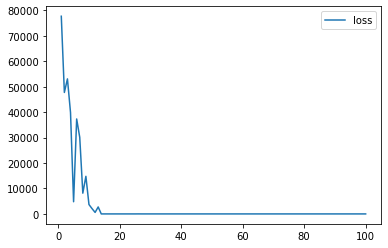

In [23]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df.plot(y="loss")

<AxesSubplot:>

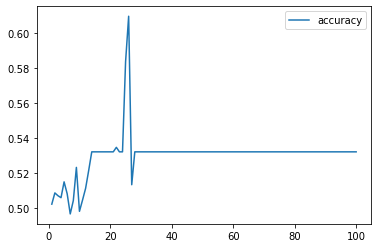

In [24]:
history_df.plot(y="accuracy")